<FONT COLOR="RED" SIZE="6">Embedded Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">1_Embedded Methods_Lasso_Regularization</FONT>

*Lasso Regularization (Least Absolute Shrinkage and Selection Operator) is a technique for feature selection and regularization that introduces an L1L1-penalty to the loss function of a regression model. This penalty shrinks some coefficients to zero, effectively selecting a subset of features. It's particularly useful when you have many correlated features.*

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Apply Lasso Regularization using Logistic Regression
lasso = LogisticRegression(
    penalty="l1",     # L1 penalty for Lasso
    solver="saga",    # SAGA solver supports L1 regularization
    C=1.0,            # Regularization strength; smaller values = stronger regularization
    max_iter=5000,
    random_state=42
)

In [7]:
lasso.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty='l1', random_state=42, solver='saga')

In [8]:
# Get the coefficients of the features
coefficients = lasso.coef_
selected_features = np.any(coefficients != 0, axis=0)
selected_feature_names = np.array(feature_names)[selected_features]


In [9]:
# Print selected features
print("Selected features (Lasso Regularization):", selected_feature_names)


Selected features (Lasso Regularization): ['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'flavanoids'
 'proanthocyanins' 'color_intensity' 'hue' 'od280/od315_of_diluted_wines'
 'proline']


In [10]:
# Evaluate performance with the selected features
accuracy = lasso.score(X_test, y_test)
print(f"Test accuracy with selected features: {accuracy:.2f}")

Test accuracy with selected features: 0.98


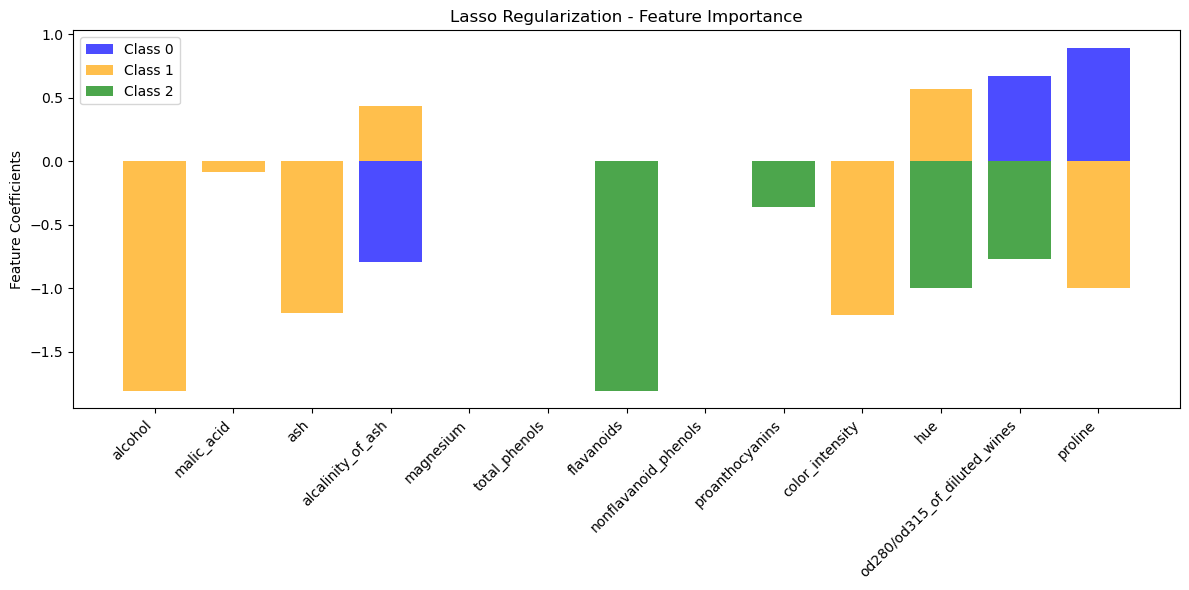

In [11]:
# Plot feature coefficients
plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients[0], color="blue", alpha=0.7, label="Class 0")
plt.bar(feature_names, coefficients[1], color="orange", alpha=0.7, label="Class 1")
plt.bar(feature_names, coefficients[2], color="green", alpha=0.7, label="Class 2")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature Coefficients")
plt.title("Lasso Regularization - Feature Importance")
plt.legend()
plt.tight_layout()
plt.show()

<b><font color="orange">Adjusting Regularization Strength:</font></b>

You can adjust the regularization strength by modifying the C parameter:
        <li>Smaller values of CC increase regularization, leading to fewer selected features.</li>
        <li>Larger values reduce regularization, leading to more selected features.</li>

<b><font color="orange">Output:</font></b>

<li>Selected Features: The features with non-zero coefficients.</li>
    <li>Accuracy: Model performance on the test set with Lasso regularization applied.</li>
    <li>Graphical Output: A bar chart showing feature importance (coefficients) for each class.</li>

<b><font color="orange">Advantages of Lasso:</font></b>

<li>Simultaneously performs feature selection and regularization.</li>
    <li>Handles multicollinearity effectively by selecting one feature from a group of correlated features.</li>

<b><font color="orange">Disadvantages:</font></b>

<li>May struggle when features are highly correlated, as it arbitrarily selects one feature.</li>